In [1]:
import pandas as pd
from lightgbm import LGBMClassifier

data = pd.read_csv("/kaggle/input/iot-dataset-for-intrusion-detection-systems-ids/BoTNeTIoT-L01-v2.csv")

X = data.drop(['label', 'Device_Name', 'Attack', 'Attack_subType'], axis=1)
y = data['label']

lgbm = LGBMClassifier()

lgbm.fit(X, y)

feature_importances_gain = lgbm.feature_importances_

feature_ranking_gain = pd.Series(feature_importances_gain, index=X.columns).sort_values(ascending=False)

feature_importances_frequency = lgbm.booster_.feature_importance(importance_type='split')
feature_ranking_frequency = pd.Series(feature_importances_frequency, index=X.columns).sort_values(ascending=False)

feature_importances_coverage = lgbm.booster_.feature_importance(importance_type='gain')
feature_ranking_coverage = pd.Series(feature_importances_coverage, index=X.columns).sort_values(ascending=False)

feature_importance_scores = pd.Series(feature_importances_gain, index=X.columns)
# print("Feature Importance Scores:")
# print(feature_importance_scores)

print("Feature Importance Scores (Split Gain):")
print(feature_ranking_gain)

print("\nFeature Importance Scores (Frequency):")
print(feature_ranking_frequency)

print("\nFeature Importance Scores (Coverage):")
print(feature_ranking_coverage)


[LightGBM] [Info] Number of positive: 555932, number of negative: 6506674
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.821598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5853
[LightGBM] [Info] Number of data points in the train set: 7062606, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.078715 -> initscore=-2.459938
[LightGBM] [Info] Start training from score -2.459938
Feature Importance Scores (Split Gain):
MI_dir_L0.1_weight      393
MI_dir_L0.1_mean        317
HH_jit_L0.1_mean        302
MI_dir_L0.1_variance    205
HH_jit_L0.1_variance    198
H_L0.1_weight           195
HpHp_L0.1_weight        182
HH_L0.1_covariance      167
HH_L0.1_radius          162
HH_L0.1_mean            136
HH_L0.1_magnitude       125
HpHp_L0.1_magnitude     114
HpHp_L0.1_radius        107
HH_L0.1_weight           95
HpHp_

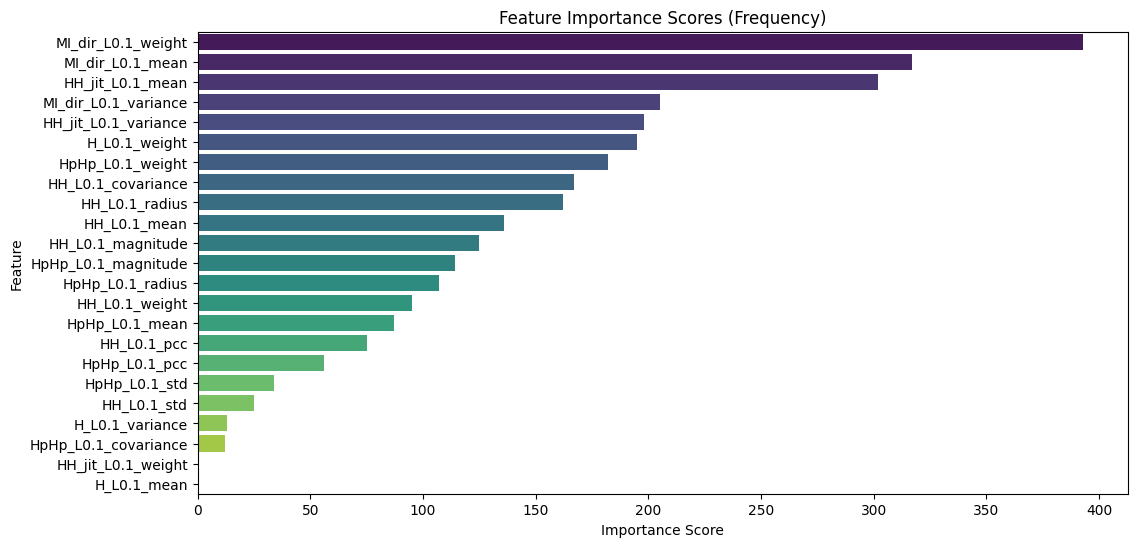

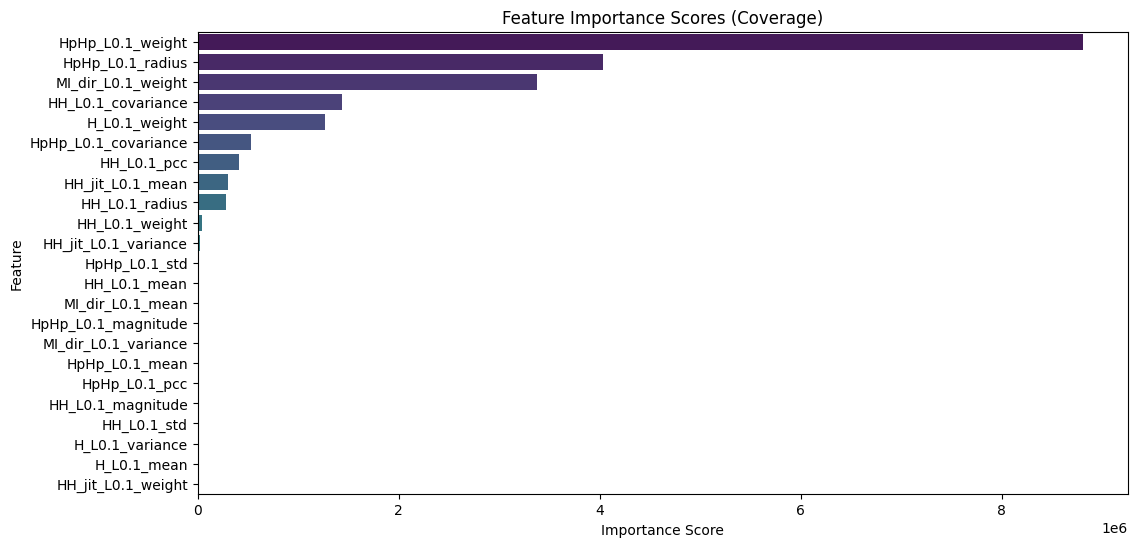

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance scores (frequency)
feature_importance_frequency = {
    'MI_dir_L0.1_weight': 393,
    'MI_dir_L0.1_mean': 317,
    'HH_jit_L0.1_mean': 302,
    'MI_dir_L0.1_variance': 205,
    'HH_jit_L0.1_variance': 198,
    'H_L0.1_weight': 195,
    'HpHp_L0.1_weight': 182,
    'HH_L0.1_covariance': 167,
    'HH_L0.1_radius': 162,
    'HH_L0.1_mean': 136,
    'HH_L0.1_magnitude': 125,
    'HpHp_L0.1_magnitude': 114,
    'HpHp_L0.1_radius': 107,
    'HH_L0.1_weight': 95,
    'HpHp_L0.1_mean': 87,
    'HH_L0.1_pcc': 75,
    'HpHp_L0.1_pcc': 56,
    'HpHp_L0.1_std': 34,
    'HH_L0.1_std': 25,
    'H_L0.1_variance': 13,
    'HpHp_L0.1_covariance': 12,
    'HH_jit_L0.1_weight': 0,
    'H_L0.1_mean': 0
}

# Feature importance scores (coverage)
feature_importance_coverage = {
    'HpHp_L0.1_weight': 8.814027e+06,
    'HpHp_L0.1_radius': 4.035174e+06,
    'MI_dir_L0.1_weight': 3.377856e+06,
    'HH_L0.1_covariance': 1.437321e+06,
    'H_L0.1_weight': 1.265561e+06,
    'HpHp_L0.1_covariance': 5.346002e+05,
    'HH_L0.1_pcc': 4.098547e+05,
    'HH_jit_L0.1_mean': 3.006259e+05,
    'HH_L0.1_radius': 2.867195e+05,
    'HH_L0.1_weight': 4.110965e+04,
    'HH_jit_L0.1_variance': 2.702305e+04,
    'HpHp_L0.1_std': 1.566759e+04,
    'HH_L0.1_mean': 1.209231e+04,
    'MI_dir_L0.1_mean': 1.168775e+04,
    'HpHp_L0.1_magnitude': 7.970577e+03,
    'MI_dir_L0.1_variance': 4.652662e+03,
    'HpHp_L0.1_mean': 1.597141e+03,
    'HpHp_L0.1_pcc': 1.455246e+03,
    'HH_L0.1_magnitude': 1.369144e+03,
    'HH_L0.1_std': 5.044601e+02,
    'H_L0.1_variance': 3.246232e+02,
    'H_L0.1_mean': 0.000000e+00,
    'HH_jit_L0.1_weight': 0.000000e+00
}

feature_importance_frequency_series = pd.Series(feature_importance_frequency)
feature_importance_coverage_series = pd.Series(feature_importance_coverage)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_frequency_series.values, y=feature_importance_frequency_series.index, palette="viridis")
plt.title('Feature Importance Scores (Frequency)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_coverage_series.values, y=feature_importance_coverage_series.index, palette="viridis")
plt.title('Feature Importance Scores (Coverage)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()



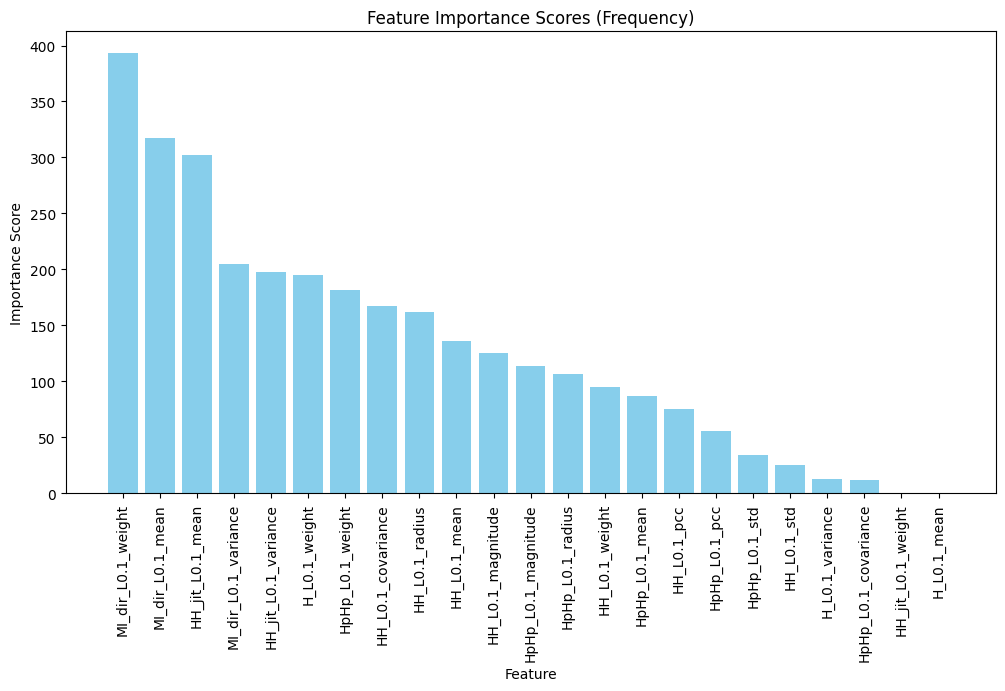

Elbow Point: 75
['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance', 'H_L0.1_weight', 'HH_L0.1_weight', 'HH_L0.1_mean', 'HH_L0.1_magnitude', 'HH_L0.1_radius', 'HH_L0.1_covariance', 'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight', 'HpHp_L0.1_mean', 'HpHp_L0.1_magnitude', 'HpHp_L0.1_radius'] 15


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

feature_importance_frequency_series = pd.Series({
    'MI_dir_L0.1_weight': 393,
    'MI_dir_L0.1_mean': 317,
    'HH_jit_L0.1_mean': 302,
    'MI_dir_L0.1_variance': 205,
    'HH_jit_L0.1_variance': 198,
    'H_L0.1_weight': 195,
    'HpHp_L0.1_weight': 182,
    'HH_L0.1_covariance': 167,
    'HH_L0.1_radius': 162,
    'HH_L0.1_mean': 136,
    'HH_L0.1_magnitude': 125,
    'HpHp_L0.1_magnitude': 114,
    'HpHp_L0.1_radius': 107,
    'HH_L0.1_weight': 95,
    'HpHp_L0.1_mean': 87,
    'HH_L0.1_pcc': 75,
    'HpHp_L0.1_pcc': 56,
    'HpHp_L0.1_std': 34,
    'HH_L0.1_std': 25,
    'H_L0.1_variance': 13,
    'HpHp_L0.1_covariance': 12,
    'HH_jit_L0.1_weight': 0,
    'H_L0.1_mean': 0
})

def find_elbow_point(series):
    values = series.values
    cumsum = np.cumsum(values)
    total = cumsum[-1]
    proportions = cumsum / total
    elbow_index = np.argmax(proportions >= 0.95)
    elbow_point = series.iloc[elbow_index]
    return elbow_point

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_frequency_series.index, feature_importance_frequency_series.values, color='skyblue')
plt.title('Feature Importance Scores (Frequency)')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

elbow_point = find_elbow_point(feature_importance_frequency_series)

print("Elbow Point:", elbow_point)
selected_features = feature_importance_scores[feature_importance_scores > elbow_point].index.tolist()
print(selected_features,len(selected_features))

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

data = pd.read_csv("/kaggle/input/iot-dataset-for-intrusion-detection-systems-ids/BoTNeTIoT-L01-v2.csv")

X = data.drop(['label', 'Device_Name', 'Attack', 'Attack_subType'], axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)

selected_featu=['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance', 'H_L0.1_weight', 'HH_L0.1_weight', 'HH_L0.1_mean', 'HH_L0.1_magnitude', 'HH_L0.1_radius', 'HH_L0.1_covariance', 'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight', 'HpHp_L0.1_mean', 'HpHp_L0.1_magnitude', 'HpHp_L0.1_radius']
X_train_selected = X_train[selected_featu]
X_test_selected = X_test[selected_featu]
lgbm.fit(X_train_selected, y_train)
print('LightGBM accuracy ', lgbm.score(X_test_selected, y_test))

[LightGBM] [Info] Number of positive: 444352, number of negative: 5205732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.285495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5862
[LightGBM] [Info] Number of data points in the train set: 5650084, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.078645 -> initscore=-2.460899
[LightGBM] [Info] Start training from score -2.460899
[LightGBM] [Info] Number of positive: 444352, number of negative: 5205732
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.102339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3822
[LightGBM] [Info] Number of data points in the train set: 5650084, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.078645 -> initscore=-2